In [17]:
import bz2
import csv
import io
import re
import random
from collections.abc import Generator
import os
from lxml import etree
from tqdm import tqdm

import numpy as np
import pandas as pd
from nltk.corpus import words
import wiki_dump

In [18]:
from dask.distributed import Client

client = Client(n_workers=6, threads_per_worker=2)  # Adjust based on your CPU
client

C:\Users\Cheng\anaconda3\lib\site-packages\distributed\node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63643 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:63643/status,
Dashboard: http://127.0.0.1:63643/status,Workers: 6
Total threads: 12,Total memory: 31.84 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63644,Workers: 6
Dashboard: http://127.0.0.1:63643/status,Total threads: 12
Started: Just now,Total memory: 31.84 GiB
Comm: tcp://127.0.0.1:63683,Total threads: 2
Dashboard: http://127.0.0.1:63690/status,Memory: 5.31 GiB
Nanny: tcp://127.0.0.1:63647,


In [19]:
import apriori_chunked
import pickle
#%time apriori_chunked.apriori_disk('data/combined.csv',1000)
#%time apriori_chunked.apriori_disk('data/output_5.csv',40000)
#%time apriori_chunked.apriori_disk('data/articles_items.csv_worker_0.csv',500)

In [20]:
# Replace with the path to your index and dump files
index_file_path = 'data/wiki.xml.bz2' #enwiki-latest-pages-articles-multistream-index.txt.bz2'
offsets_file_path = 'data/offsets.txt'
dump_file_path = 'data/enwiki-latest-pages-articles-multistream.xml.bz2'
output_csv_path = 'data/articles_items.csv'
data = "data/Market_Basket_Optimisation.csv"

In [25]:
import apriori_general_v0 as ap

In [27]:
frequent_itemsets = ap.apriori_disk(data,[None,{'\n'},{''}],0.02,500)

no rows:  7501
Frequent Itemsets Level 2 completed


In [28]:
frequent_itemsets

{frozenset({'shrimp'}): 536,
 frozenset({'almonds'}): 153,
 frozenset({'avocado'}): 250,
 frozenset({'vegetables mix'}): 193,
 frozenset({'cottage cheese'}): 239,
 frozenset({'energy drink'}): 200,
 frozenset({'tomato juice'}): 228,
 frozenset({'low fat yogurt'}): 574,
 frozenset({'green tea'}): 991,
 frozenset({'honey'}): 356,
 frozenset({'mineral water'}): 1788,
 frozenset({'salmon'}): 319,
 frozenset({'frozen smoothie'}): 475,
 frozenset({'burgers'}): 654,
 frozenset({'meatballs'}): 157,
 frozenset({'eggs'}): 1348,
 frozenset({'turkey'}): 469,
 frozenset({'milk'}): 972,
 frozenset({'energy bar'}): 203,
 frozenset({'whole wheat rice'}): 439,
 frozenset({'whole wheat pasta'}): 221,
 frozenset({'french fries'}): 1282,
 frozenset({'soup'}): 379,
 frozenset({'frozen vegetables'}): 715,
 frozenset({'spaghetti'}): 1306,
 frozenset({'cookies'}): 603,
 frozenset({'cooking oil'}): 383,
 frozenset({'champagne'}): 351,
 frozenset({'chocolate'}): 1230,
 frozenset({'chicken'}): 450,
 frozenset({'

In [49]:
freq_list = list(frequent_itemsets.keys())

itemset_features = ap.check_itemsets(data, freq_list, "40MB")

In [64]:
itemset_features
len(itemset_features)

7501

In [65]:
with open('data/itemset_features.pkl', 'wb') as f:
            pickle.dump(itemset_features, f)

7501

In [53]:
import clustering

In [54]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv("data/Market_Basket_Optimisation.csv")
all_transactions = df.apply(lambda x: x.tolist(), axis=1).tolist()

print(all_transactions)


[[2, 'burgers', 'meatballs', 'eggs', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [3, 'chutney', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [4, 'turkey', 'avocado', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [5, 'mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [6, 'low fat yogurt', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [7, 'whole wheat pasta', 'french fries', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [8, 'soup', 'light cream', 'shallot', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [9, 'frozen vegetables', 'spaghetti', 'green tea', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [63]:
unique_items = {item for itemset in frequent_itemsets for item in itemset}
print(unique_items)
# Initialize MultiLabelBinarizer with the unique items obtained from global_frequent_itemsets
mlb = MultiLabelBinarizer(classes=sorted(unique_items))

# Prepare the binary matrix for the given transactions
binary_matrix = mlb.fit_transform(all_transactions)
print(binary_matrix[23])

{'vegetables mix', 'escalope', 'muffins', 'olive oil', 'whole wheat pasta', 'red wine', 'brownies', 'light mayo', 'ground beef', 'ham', 'cookies', 'low fat yogurt', 'green tea', 'mineral water', 'french wine', 'chicken', 'yogurt cake', 'frozen smoothie', 'energy drink', 'cereals', 'shrimp', 'cottage cheese', 'honey', 'herb & pepper', 'eggs', 'chocolate', 'fresh bread', 'cooking oil', 'soup', 'whole wheat rice', 'energy bar', 'frozen vegetables', 'grated cheese', 'butter', 'oil', 'fresh tuna', 'cake', 'champagne', 'almonds', 'tomatoes', 'milk', 'hot dogs', 'strawberries', 'french fries', 'turkey', 'salmon', 'burgers', 'pancakes', 'meatballs', 'pepper', 'tomato juice', 'avocado', 'spaghetti'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\Cheng\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:875: UserWarning: unknown class(es) [' asparagus', 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 101, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 102, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 103, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 104, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 105, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 106, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 107, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 108, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 109, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 11, 110, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 111, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 112, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 113, 1130, 1131, 1132

In [58]:
len(binary_matrix)

7501

In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming binary_matrix is your binary matrix from previous steps
# Apply PCA to reduce the dimensionality for visualization purposes
# can tune PCA input, can be used for part 4

In [60]:
pca = PCA(2)
reduced_data_2 = pca.fit_transform(binary_matrix)
print(reduced_data_2)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


C:\Users\Cheng\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:595: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


In [43]:
pca = PCA(3)
reduced_data_3 = pca.fit_transform(binary_matrix)
print(reduced_data_3)

[[-0.18029207  0.46971576 -0.71994554]
 [-0.47643016 -0.23881202 -0.0109044 ]
 [-0.372657   -0.16629678 -0.02471606]
 ...
 [-0.38059011 -0.20955707  0.00850986]
 [-0.43725396 -0.04762068  0.1431145 ]
 [-0.17516598  0.34594794 -0.63833489]]


In [61]:
#for i in reduced_data_2:
#    print(i[0])

x = [i[0] for i in reduced_data_2]
y = [i[1] for i in reduced_data_2]
print(x,y)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
print(reduced_data_2[0][1])

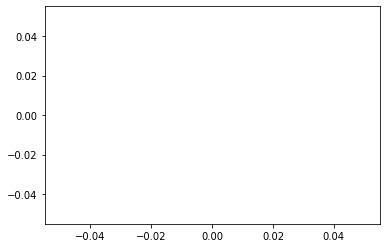

In [62]:
plt.plot(x,y) 
plt.show()

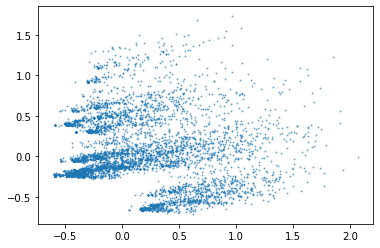

In [46]:
plt.scatter(x, y, s=1, alpha=0.5)
plt.show()